In [139]:
# 86decd5
# branch: parameter search implementation

import openpiv_recipes as piv
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
reload(piv)

folder_path = 'C:/Users/yj/Dropbox (Harvard University)/Riblet/data/piv-data/2021-01-18'
folder_path = '/Users/yeonsu/Dropbox (Harvard University)/Riblet/data/piv-data/2021-01-18'
pi = piv.ParticleImage(folder_path)

exp_cond_dict = {'sample': 'Flat_10', 'motor': 5}
pi.set_piv_list(exp_cond_dict)

piv_param = {
    "winsize": 48,
    "searchsize": 52,
    "overlap": 24,
    "dt": 0.0001,
    "image_check": False,
    "show_vertical_profiles": False,
    "figure_export_name": '_quick_piv.tiff',
    "text_export_name": '_quick_piv.txt',
    "scale_factor": 1,            
    "pixel_density": 36.74,
    "arrow_width": 0.02,
    "show_result": True,        
    }

In [140]:
def large_quiver(window_size,scaling_factor):
    bgd, bgd2 = pi.read_two_images(search_dict,index_a=101,index_b=102)
    bgd = -np.array(bgd).T
    piv_result = np.loadtxt('_quick_piv.txt')
    arrow_width = 0.002

    xx = piv_result[:,0].T * 0.8 * bgd.shape[1] / np.max(piv_result[:,0])
    yy = piv_result[:,1].T * bgd.shape[0] / np.max(piv_result[:,1])
    uu = piv_result[:,2].T
    vv = piv_result[:,3].T

    fig, ax = plt.subplots(figsize=(10,10))

    xmax = np.amax(piv_result[:, 0]) + window_size / (2 * scaling_factor)
    ymax = np.amax(piv_result[:, 1]) + window_size / (2 * scaling_factor)

    ax.quiver(xx,yy,uu,vv,angles='uv',width=arrow_width,color='r')
    ax.imshow(bgd,origin="lower", cmap="Greys_r",interpolation='nearest',aspect='auto')

In [141]:
exp_cond_dict = {'sample': 'Flat_10', 'motor': 5}
pi.set_piv_list(exp_cond_dict)

In [142]:
search_dict = {'pos': 2, 'VOFFSET': 480}
pi.open_two_images(search_dict)

In [143]:
im1, im2 = pi.read_two_images(search_dict)

Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


In [144]:
large_winsize = 48
small_winsize = 16

overlap = 0.5

In [145]:
def crop_window_area(img,x,y,winsize,overlap):
    img_shape = img.shape
    
    out1 = img[x - winsize//2: x + winsize//2, y - winsize//2 :y + winsize//2]   
    
    print(img_shape,out1.shape)
    return out1

In [146]:
large_cropped1 = crop_window_area(np.array(im1).T,24,24,large_winsize,0)
small_cropped1 = crop_window_area(np.array(im1).T,24,24,small_winsize,0)

large_cropped2 = crop_window_area(np.array(im1).T,200,24,large_winsize,0)
small_cropped2 = crop_window_area(np.array(im1).T,200,24,small_winsize,0)

large_cropped3 = crop_window_area(np.array(im1).T,1000,24,large_winsize,0)
small_cropped3 = crop_window_area(np.array(im1).T,1000,24,small_winsize,0)

lc = [large_cropped1,large_cropped2,large_cropped3]
sc = [small_cropped1,small_cropped2,small_cropped3]

mid_winsize = 32
mc = []
index_list = [24,200,1000]
for i in range(3):
    mc.append(crop_window_area(np.array(im1).T,index_list[i],24,mid_winsize,0))


(1408, 108) (48, 48)
(1408, 108) (16, 16)
(1408, 108) (48, 48)
(1408, 108) (16, 16)
(1408, 108) (48, 48)
(1408, 108) (16, 16)
(1408, 108) (32, 32)
(1408, 108) (32, 32)
(1408, 108) (32, 32)


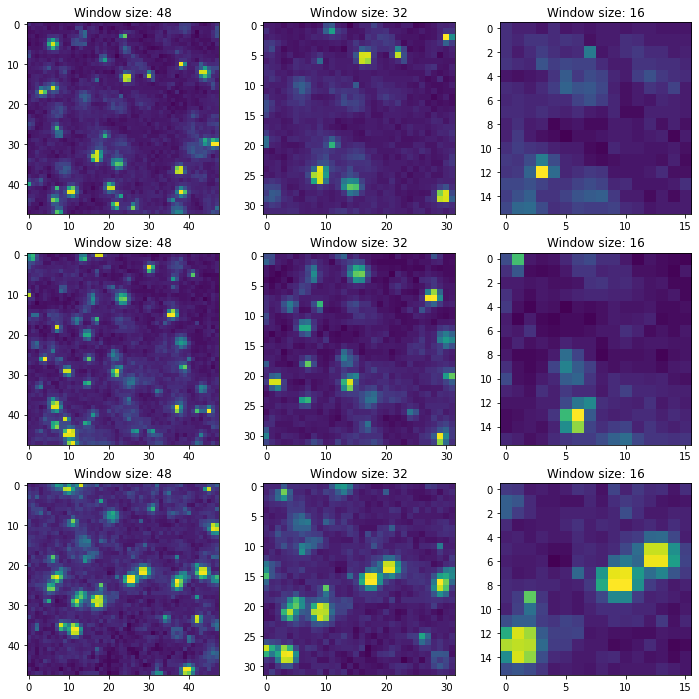

In [147]:
fig, ax = plt.subplots(3,3,figsize = (12,12))

i = 0
for x, y,z in zip(lc, mc,sc):
    ax[i,0].imshow(x)
    ax[i,1].imshow(y)
    ax[i,2].imshow(z)
    ax[i,0].set_title('Window size: 48')
    ax[i,1].set_title('Window size: 32')    
    ax[i,2].set_title('Window size: 16')    
    i = i + 1

In [148]:
piv_param = {
    "winsize": 48,
    "searchsize": 52,
    "overlap": 24,
    "dt": 0.0001,
    "image_check": False,    
    "show_vertical_profiles": False,            
    "figure_export_name": '_quick_piv.tiff',
    "text_export_name": '_quick_piv.txt',
    "scale_factor": 1,            
    "pixel_density": 36.74,
    "arrow_width": 0.02,
    "show_result": True,        
    }
pi.set_piv_param(piv_param)

- PIV parameters -
winsize: 48
searchsize: 52
overlap: 24
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1
pixel_density: 36.74
arrow_width: 0.02
show_result: True
upper_bound: 2000
lower_bound: -2000
Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


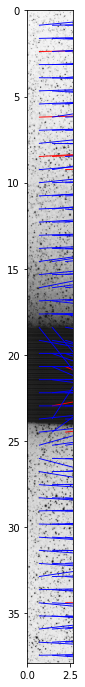

Std of u3: 41.223
Mean of u3: 114.617
Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


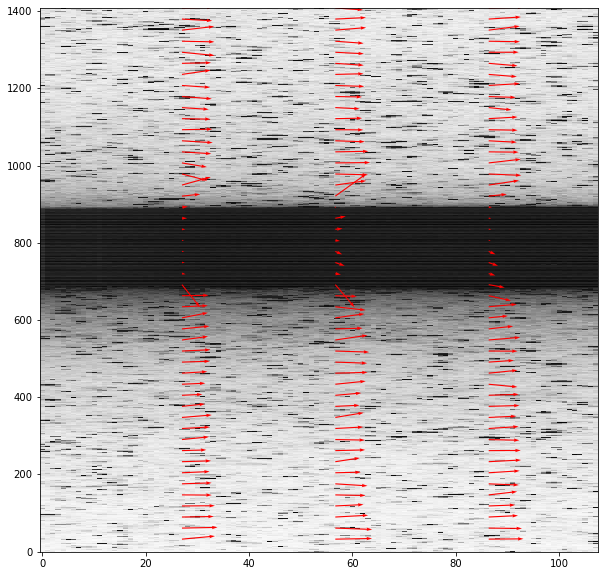

In [149]:
large = {"winsize": 48, "searchsize": 52, "overlap": 24, "scale_factor": 1}
pi.set_piv_param(large)

search_dict = {'pos': 2, 'VOFFSET': 480}
pi.quick_piv_by_key(search_dict,index_a=101,index_b=102)
large_quiver(48,1)

- PIV parameters -
winsize: 32
searchsize: 36
overlap: 16
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1
pixel_density: 36.74
arrow_width: 0.02
show_result: True
upper_bound: 2000
lower_bound: -2000
Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


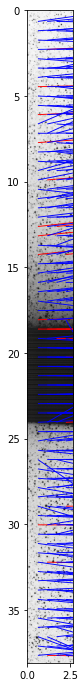

Std of u3: 42.330
Mean of u3: 112.594
Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


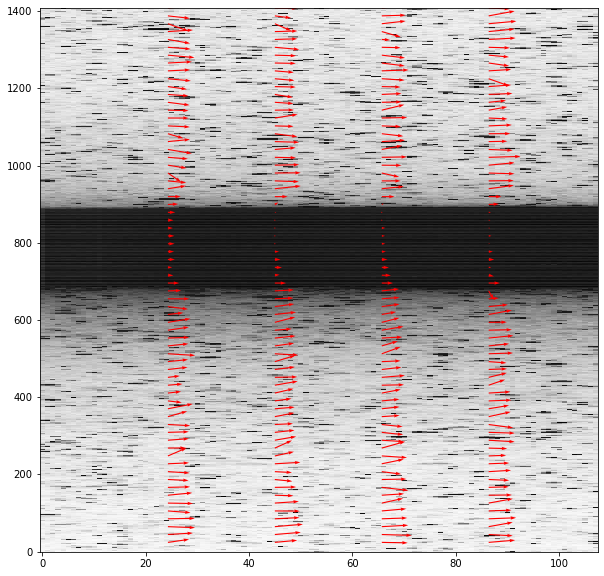

In [150]:
middle = {"winsize": 32, "searchsize": 36, "overlap": 16, "scale_factor": 1}
pi.set_piv_param(middle)
pi.quick_piv_by_key(search_dict,index_a=101,index_b=102)
large_quiver(32,1)

- PIV parameters -
winsize: 16
searchsize: 20
overlap: 8
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1000.0
pixel_density: 36.74
arrow_width: 0.02
show_result: True
upper_bound: 2000
lower_bound: -2000
Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


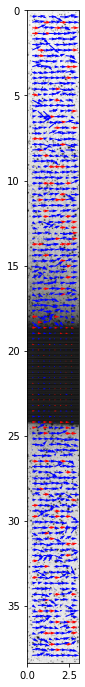

Std of u3: 45.770
Mean of u3: 112.146
Read image from: Flat_10_motor5.00_pos2_VOFFSET480_01-18_ag2_laser10


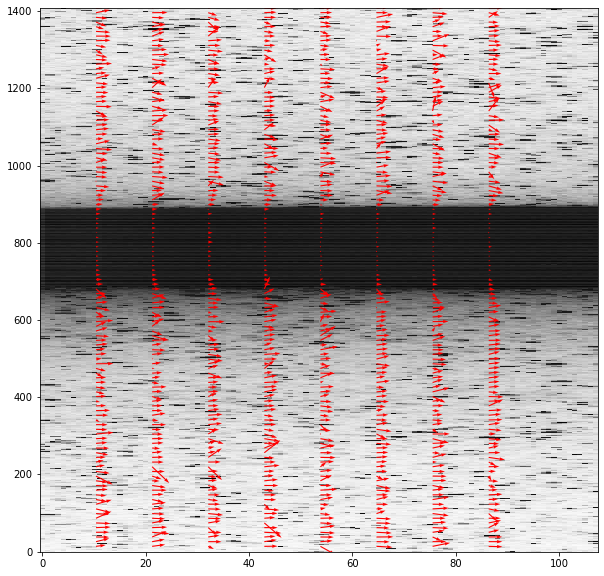

In [151]:
small = {"winsize": 16, "searchsize": 20, "overlap": 8, "scale_factor": 1e3}
pi.set_piv_param(small)
pi.quick_piv_by_key(search_dict,index_a=101,index_b=102)
large_quiver(16,1)